In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
# Read the csv file into a pandas DataFrame
auto = pd.read_csv('MPG_test.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [7]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
auto['car_name'] = auto['car_name'].replace(['volkswagen','vokswagen','vw'],'VW')
auto['car_name'] = auto['car_name'].replace('maxda','mazda')
auto['car_name'] = auto['car_name'].replace('toyouta','toyota')
auto['car_name'] = auto['car_name'].replace('mercedes','mercedes-benz')
auto['car_name'] = auto['car_name'].replace('nissan','datsun')
auto['car_name'] = auto['car_name'].replace('capri','ford')
auto['car_name'] = auto['car_name'].replace(['chevroelt','chevy'],'chevrolet')
auto['car_name'].fillna(value = 'subaru',inplace=True)  ## Strin methords will not work on null values so we use fillna()

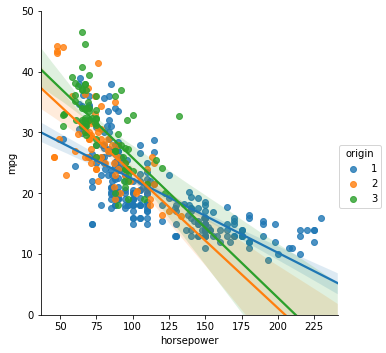

In [10]:
import seaborn as sns
var = 'horsepower'
plot = sns.lmplot(var,'mpg',data=auto,hue='origin')
plot.set(ylim = (0,50))

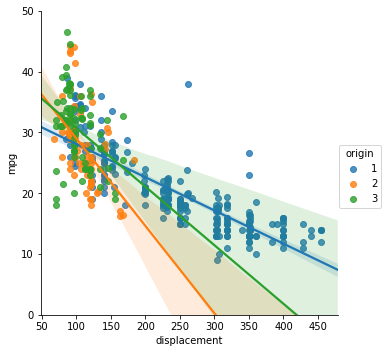

In [12]:
var = 'displacement'
plot = sns.lmplot(var,'mpg',data=auto,hue='origin')
plot.set(ylim = (0,50))

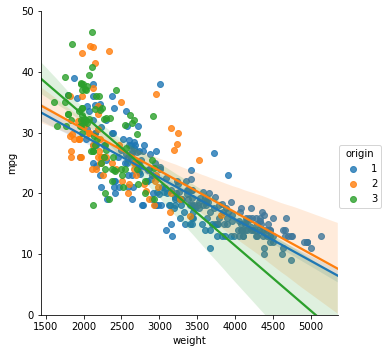

In [13]:
var = 'weight'
plot = sns.lmplot(var,'mpg',data=auto,hue='origin')
plot.set(ylim = (0,50))

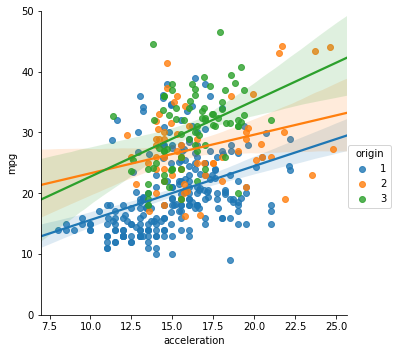

In [14]:
var = 'acceleration'
plot = sns.lmplot(var,'mpg',data=auto,hue='origin')
plot.set(ylim = (0,50))

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [16]:
factors = ['cylinders','displacement','horsepower','acceleration','weight','origin','model_year']
X = pd.DataFrame(auto[factors].copy())
y = auto['mpg'].copy()

In [17]:
X = StandardScaler().fit_transform(X)

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=324)
X_train.shape[0] == y_train.shape[0]

True

In [19]:
regressor = LinearRegression()

In [20]:
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [21]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
y_predicted = regressor.predict(X_test)

In [23]:
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted))
rmse

3.486729614901561

In [24]:
gb_regressor = GradientBoostingRegressor(n_estimators=4000)
gb_regressor.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=4000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [25]:
gb_regressor.get_params()

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 4000,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}

In [26]:
y_predicted_gbr = gb_regressor.predict(X_test)

In [27]:
rmse_bgr = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted_gbr))
rmse_bgr

2.685830505392152

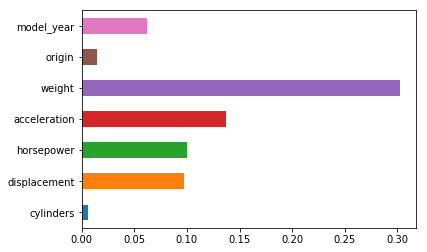

In [28]:
fi= pd.Series(gb_regressor.feature_importances_,index=factors)
fi.plot.barh()

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA(n_components=2)

In [31]:
pca.fit(auto[factors])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [32]:
pca.explained_variance_ratio_

array([0.99756151, 0.0020628 ])

In [33]:
pca1 = pca.components_[0]
pca2 = pca.components_[1]

In [34]:
transformed_data = pca.transform(auto[factors])

In [36]:
pc1 = transformed_data[:,0]
pc2 = transformed_data[:,1]

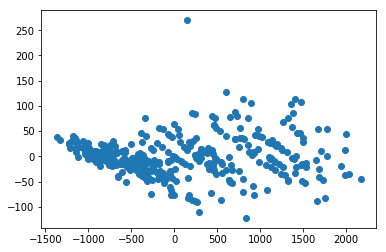

In [37]:
plt.scatter(pc1,pc2)

In [39]:
c = pca.inverse_transform(transformed_data[(transformed_data[:,0]>0 )& (transformed_data[:,1]>250)])
c

array([[9.32016159e+00, 4.65727261e+02, 1.90441442e+02, 5.95699243e+00,
        3.08611199e+03, 6.23550659e-01, 6.93571097e+01]])

In [40]:
auto[(auto['model_year'] == 70 )&( auto.displacement>400)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
13,14.0,8,455.0,225,3086,10.0,70,1,buick estate wagon (sw)


In [80]:
auto[(auto['cylinders'] == 8 )&( auto.displacement>400)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
13,14.0,8,455.0,225,3086,10.0,70,1,buick estate wagon (sw)
66,11.0,8,429.0,208,4633,11.0,72,1,mercury marquis
89,12.0,8,429.0,198,4952,11.5,73,1,mercury marquis brougham
93,13.0,8,440.0,215,4735,11.0,73,1,chrysler new yorker brougham
94,12.0,8,455.0,225,4951,11.0,73,1,buick electra 225 custom


In [41]:
cv_sets = KFold(n_splits=10, shuffle= True,random_state=100)
params = {'n_estimators' : list(range(40,61)),
         'max_depth' : list(range(1,10)),
         'learning_rate' : [0.1,0.2,0.3] }
grid = GridSearchCV(gb_regressor, params,cv=cv_sets,n_jobs=4)

In [83]:
for train_index, test_index in cv_sets.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [  0   2   3   4   5   6   8   9  10  11  12  13  14  15  16  17  18  19
  20  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  70  71  72  73  74  76  77
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 111 112 113 114 115
 116 117 118 119 120 121 122 123 125 126 127 128 130 131 133 134 135 137
 138 139 141 142 143 144 145 146 147 148 150 151 153 154 155 156 157 158
 159 160 162 164 165 166 167 168 169 170 171 172 173 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 191 192 193 194 195 196 197 198
 199 200 202 203 204 205 206 207 208 209 210 211 212 214 215 216 217 218
 219 220 221 222 223 224 226 228 229 230 232 233 235 236 237 238 240 241
 242 243 244 245 247 248 249 250 251 253 254 255 256 259 260 261 262 263
 264 265 266 268 269 270 271 272 273 274 275

IndexError: index 5 is out of bounds for axis 0 with size 5

In [42]:
grid = grid.fit(X_train, y_train)

In [43]:
grid.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.3, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=51, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [44]:
gb_regressor_t = grid.best_estimator_
gb_regressor_t.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.3, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=51, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [45]:
y_predicted_gbr_t = gb_regressor_t.predict(X_test)

In [46]:
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted_gbr_t))
rmse

2.71848183572113

In [50]:
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [51]:
ridge_linear = Ridge(alpha=1.0)
lasso_linear = linear_model.Lasso(alpha=1.0)


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linear', LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False))])


In [57]:
model = poly_model.fit(x[:, np.newaxis], y)
model.named_steps['linear'].coef_

array([ 1.8,  6.6, -5. ])

array([[0],
       [1],
       [2],
       [3],
       [4]])

[[   4. ]
 [ 497. ]
 [  72. ]
 [3626. ]
 [  13.4]]
[-5.18000000e+01 -1.23176300e+06 -2.54430000e+04 -6.57154466e+07
 -8.07560000e+02]


array([[   4. ,  497. ,   72. , 3626. ,   13.4]])

[-5.18000000e+01 -1.23176300e+06 -2.54430000e+04 -6.57154466e+07
 -8.07560000e+02]
